In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv("diabetic_data.csv")

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

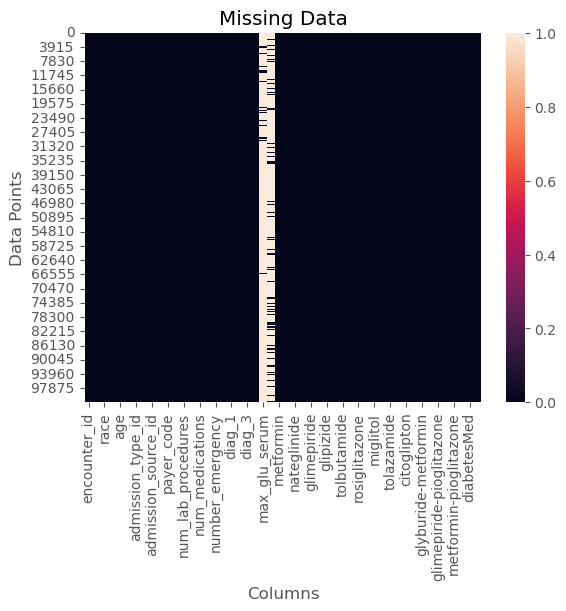

In [7]:
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [8]:
print(list(df))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [9]:
#df.groupby(['patient_nbr']).count()
df['patient_nbr'].value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [10]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications           

In [12]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [13]:
df.drop(features_drop_list, axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2                    

In [15]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)


In [19]:
df.loc[(df['diag_1'] >= 1) & (df['diag_1'] < 140), 'diag_1'] = 1
df.loc[(df['diag_1'] >= 140) & (df['diag_1'] < 240), 'diag_1'] = 2
df.loc[(df['diag_1'] >= 240) & (df['diag_1'] < 280), 'diag_1'] = 3
df.loc[(df['diag_1'] >= 280) & (df['diag_1'] < 290), 'diag_1'] = 4
df.loc[(df['diag_1'] >= 290) & (df['diag_1'] < 320), 'diag_1'] = 5
df.loc[(df['diag_1'] >= 320) & (df['diag_1'] < 390), 'diag_1'] = 6
df.loc[(df['diag_1'] >= 390) & (df['diag_1'] < 460), 'diag_1'] = 7
df.loc[(df['diag_1'] >= 460) & (df['diag_1'] < 520), 'diag_1'] = 8
df.loc[(df['diag_1'] >= 520) & (df['diag_1'] < 580), 'diag_1'] = 9
df.loc[(df['diag_1'] >= 580) & (df['diag_1'] < 630), 'diag_1'] = 10
df.loc[(df['diag_1'] >= 630) & (df['diag_1'] < 680), 'diag_1'] = 11
df.loc[(df['diag_1'] >= 680) & (df['diag_1'] < 710), 'diag_1'] = 12
df.loc[(df['diag_1'] >= 710) & (df['diag_1'] < 740), 'diag_1'] = 13
df.loc[(df['diag_1'] >= 740) & (df['diag_1'] < 760), 'diag_1'] = 14
df.loc[(df['diag_1'] >= 760) & (df['diag_1'] < 780), 'diag_1'] = 15
df.loc[(df['diag_1'] >= 780) & (df['diag_1'] < 800), 'diag_1'] = 16
df.loc[(df['diag_1'] >= 800) & (df['diag_1'] < 1000), 'diag_1'] = 17
df.loc[df['diag_1'] == -1, 'diag_1'] = 0

In [20]:
df.loc[(df['diag_2'] >= 1) & (df['diag_2'] < 140), 'diag_2'] = 1
df.loc[(df['diag_2'] >= 140) & (df['diag_2'] < 240), 'diag_2'] = 2
df.loc[(df['diag_2'] >= 240) & (df['diag_2'] < 280), 'diag_2'] = 3
df.loc[(df['diag_2'] >= 280) & (df['diag_2'] < 290), 'diag_2'] = 4
df.loc[(df['diag_2'] >= 290) & (df['diag_2'] < 320), 'diag_2'] = 5
df.loc[(df['diag_2'] >= 320) & (df['diag_2'] < 390), 'diag_2'] = 6
df.loc[(df['diag_2'] >= 390) & (df['diag_2'] < 460), 'diag_2'] = 7
df.loc[(df['diag_2'] >= 460) & (df['diag_2'] < 520), 'diag_2'] = 8
df.loc[(df['diag_2'] >= 520) & (df['diag_2'] < 580), 'diag_2'] = 9
df.loc[(df['diag_2'] >= 580) & (df['diag_2'] < 630), 'diag_2'] = 10
df.loc[(df['diag_2'] >= 630) & (df['diag_2'] < 680), 'diag_2'] = 11
df.loc[(df['diag_2'] >= 680) & (df['diag_2'] < 710), 'diag_2'] = 12
df.loc[(df['diag_2'] >= 710) & (df['diag_2'] < 740), 'diag_2'] = 13
df.loc[(df['diag_2'] >= 740) & (df['diag_2'] < 760), 'diag_2'] = 14
df.loc[(df['diag_2'] >= 760) & (df['diag_2'] < 780), 'diag_2'] = 15
df.loc[(df['diag_2'] >= 780) & (df['diag_2'] < 800), 'diag_2'] = 16
df.loc[(df['diag_2'] >= 800) & (df['diag_2'] < 1000), 'diag_2'] = 17
df.loc[df['diag_2'] == -1, 'diag_2'] = 0

In [21]:
df.loc[(df['diag_3'] >= 1) & (df['diag_3'] < 140), 'diag_3'] = 1
df.loc[(df['diag_3'] >= 140) & (df['diag_3'] < 240), 'diag_3'] = 2
df.loc[(df['diag_3'] >= 240) & (df['diag_3'] < 280), 'diag_3'] = 3
df.loc[(df['diag_3'] >= 280) & (df['diag_3'] < 290), 'diag_3'] = 4
df.loc[(df['diag_3'] >= 290) & (df['diag_3'] < 320), 'diag_3'] = 5
df.loc[(df['diag_3'] >= 320) & (df['diag_3'] < 390), 'diag_3'] = 6
df.loc[(df['diag_3'] >= 390) & (df['diag_3'] < 460), 'diag_3'] = 7
df.loc[(df['diag_3'] >= 460) & (df['diag_3'] < 520), 'diag_3'] = 8
df.loc[(df['diag_3'] >= 520) & (df['diag_3'] < 580), 'diag_3'] = 9
df.loc[(df['diag_3'] >= 580) & (df['diag_3'] < 630), 'diag_3'] = 10
df.loc[(df['diag_3'] >= 630) & (df['diag_3'] < 680), 'diag_3'] = 11
df.loc[(df['diag_3'] >= 680) & (df['diag_3'] < 710), 'diag_3'] = 12
df.loc[(df['diag_3'] >= 710) & (df['diag_3'] < 740), 'diag_3'] = 13
df.loc[(df['diag_3'] >= 740) & (df['diag_3'] < 760), 'diag_3'] = 14
df.loc[(df['diag_3'] >= 760) & (df['diag_3'] < 780), 'diag_3'] = 15
df.loc[(df['diag_3'] >= 780) & (df['diag_3'] < 800), 'diag_3'] = 16
df.loc[(df['diag_3'] >= 800) & (df['diag_3'] < 1000), 'diag_3'] = 17
df.loc[df['diag_3'] == -1, 'diag_3'] = 0

In [22]:
df.diag_1.unique()

array([1., 0.])

In [23]:
df['race'] = df['race'].replace('?', 'Other')

In [24]:
df.race.value_counts()

race
Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: count, dtype: int64

In [25]:
df.gender.value_counts()

gender
Female             38025
Male               33490
Unknown/Invalid        3
Name: count, dtype: int64

In [26]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

gender
Female    38028
Male      33490
Name: count, dtype: int64

In [27]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()

gender
0    38028
1    33490
Name: count, dtype: int64

In [28]:
df.age.value_counts()

age
[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: count, dtype: int64

In [29]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
df['age'].value_counts()

age
75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: count, dtype: int64

In [30]:
df.max_glu_serum.value_counts()

max_glu_serum
Norm    1731
>200     969
>300     756
Name: count, dtype: int64

In [31]:
df['max_glu_serum']=df['max_glu_serum'].replace("None", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)
df.max_glu_serum.value_counts()

max_glu_serum
1.0    1731
2.0     969
3.0     756
Name: count, dtype: int64

In [32]:
df.A1Cresult.value_counts()

A1Cresult
>8      6304
Norm    3791
>7      2891
Name: count, dtype: int64

In [36]:
df['A1Cresult']=df['A1Cresult'].replace("None", 0)
df['A1Cresult']=df['A1Cresult'].replace("Norm", 1)
df['A1Cresult']=df['A1Cresult'].replace(">7", 2)
df['A1Cresult']=df['A1Cresult'].replace(">8", 3)
df['A1Cresult'].value_counts()


A1Cresult
3.0    6304
1.0    3791
2.0    2891
Name: count, dtype: int64

In [37]:
df.insulin.value_counts()

insulin
No        34921
Steady    22129
Down       7505
Up         6963
Name: count, dtype: int64

In [38]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    df[i] = df[i].replace('No', 0)
    df[i] = df[i].replace('Steady', 2)
    df[i] = df[i].replace('Down', 1)
    df[i] = df[i].replace('Up', 3)

In [39]:
df.insulin.value_counts()

insulin
0    34921
2    22129
1     7505
3     6963
Name: count, dtype: int64

In [40]:
df.change.value_counts()

change
No    39494
Ch    32024
Name: count, dtype: int64

In [41]:
df.diabetesMed.value_counts()

diabetesMed
Yes    54319
No     17199
Name: count, dtype: int64

In [42]:
df.readmitted.value_counts()

readmitted
NO     42985
>30    22240
<30     6293
Name: count, dtype: int64

In [43]:
df['readmitted']=df['readmitted'].replace('NO', 0)
df['readmitted']=df['readmitted'].replace('>30', 1)
df['readmitted']=df['readmitted'].replace('<30', 2)
df.readmitted.value_counts()

readmitted
0    42985
1    22240
2     6293
Name: count, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71518 non-null  object 
 1   gender                    71518 non-null  int64  
 2   age                       71518 non-null  int64  
 3   admission_type_id         71518 non-null  int64  
 4   discharge_disposition_id  71518 non-null  int64  
 5   admission_source_id       71518 non-null  int64  
 6   time_in_hospital          71518 non-null  int64  
 7   num_lab_procedures        71518 non-null  int64  
 8   num_procedures            71518 non-null  int64  
 9   num_medications           71518 non-null  int64  
 10  number_outpatient         71518 non-null  int64  
 11  number_emergency          71518 non-null  int64  
 12  number_inpatient          71518 non-null  int64  
 13  diag_1                    71518 non-null  float64
 14  diag_2    

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


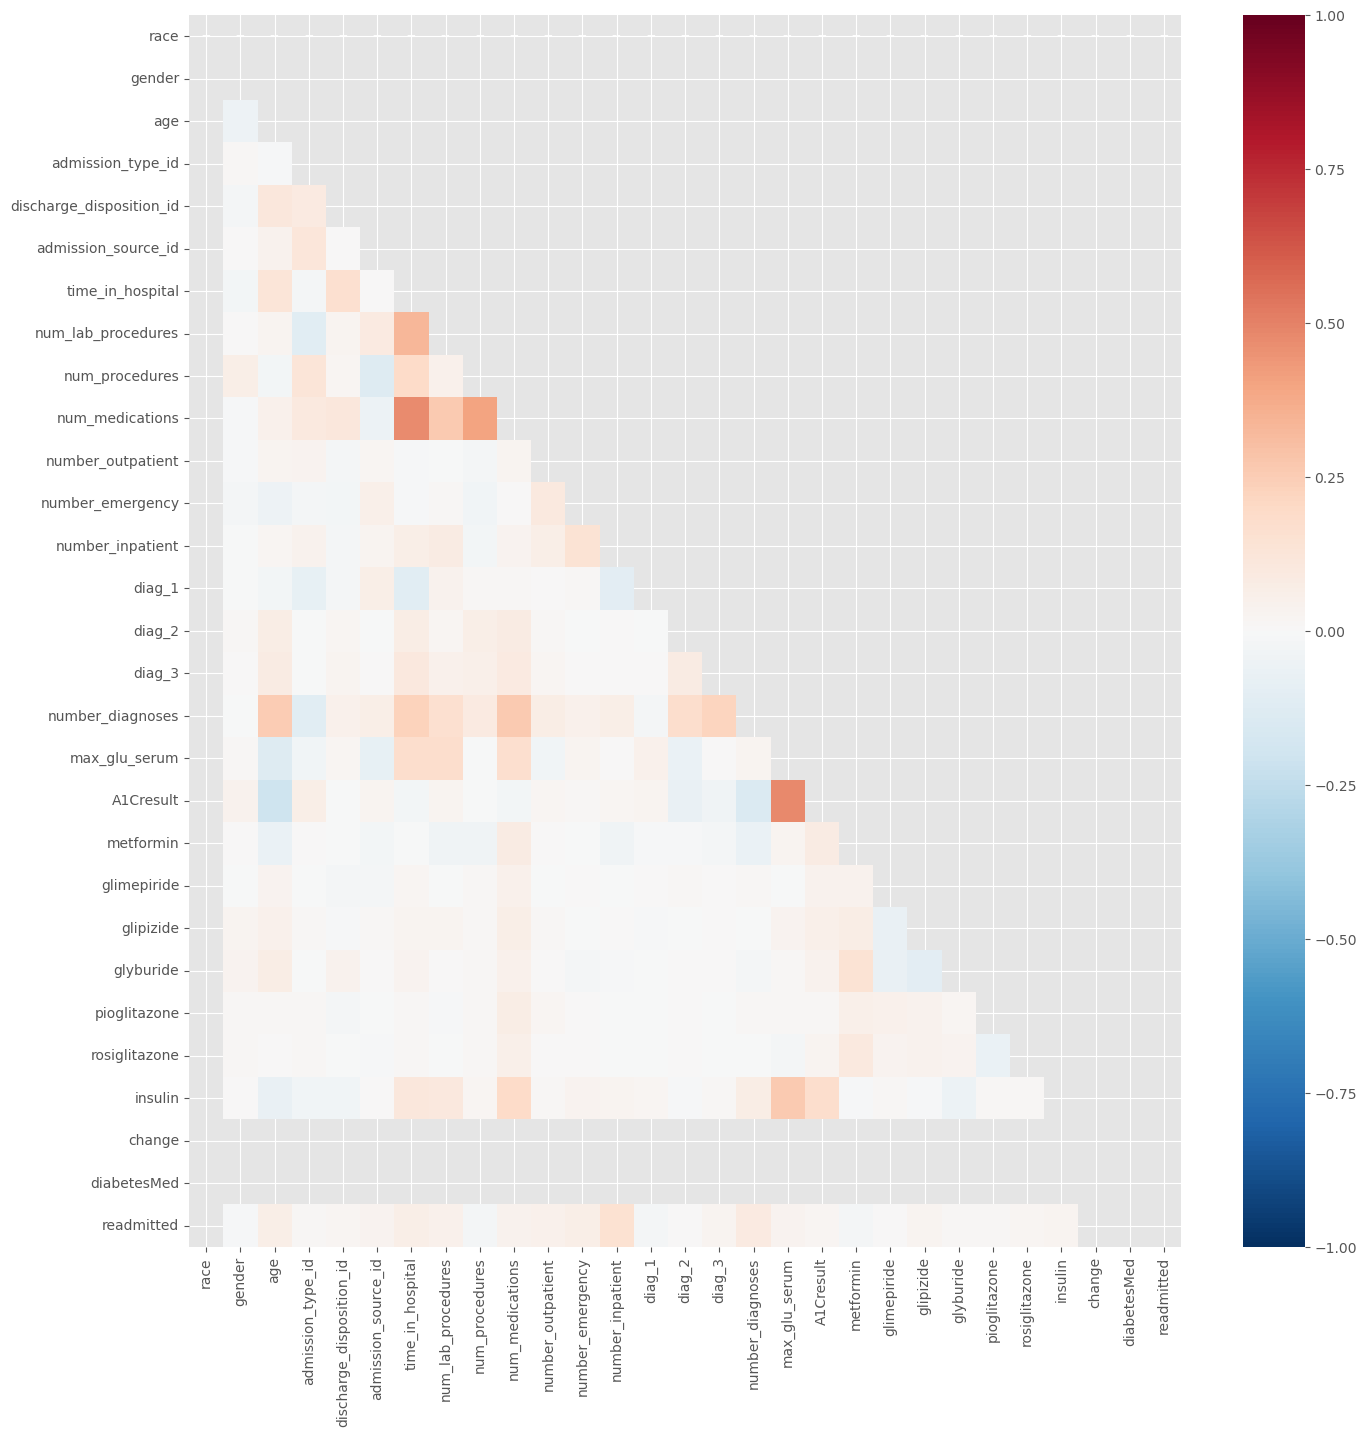

In [48]:
# Assuming df is your DataFrame
# Convert non-numeric values to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
matrix = np.triu(df_numeric.corr())

# Create the heatmap
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_numeric.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center=0, mask=matrix, cmap='RdBu_r')
plt.show()

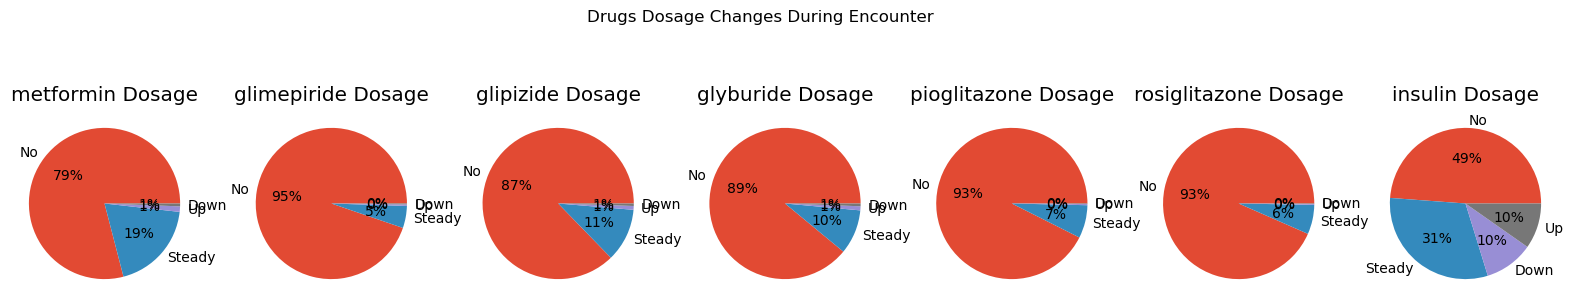

In [53]:
fig, ax = plt.subplots(1, 7,figsize=(20, 4), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['metformin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[0].set_title('metformin Dosage')
ax[1].pie(df['glimepiride'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[1].set_title('glimepiride Dosage')
ax[2].pie(df['glipizide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[2].set_title('glipizide Dosage')
ax[3].pie(df['glyburide'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[3].set_title('glyburide Dosage')
ax[4].pie(df['pioglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[4].set_title('pioglitazone Dosage')
ax[5].pie(df['rosiglitazone'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Up', 'Down'])
ax[5].set_title('rosiglitazone Dosage')
ax[6].pie(df['insulin'].value_counts(), autopct='%1.0f%%', labels=['No', 'Steady', 'Down', 'Up'])
ax[6].set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


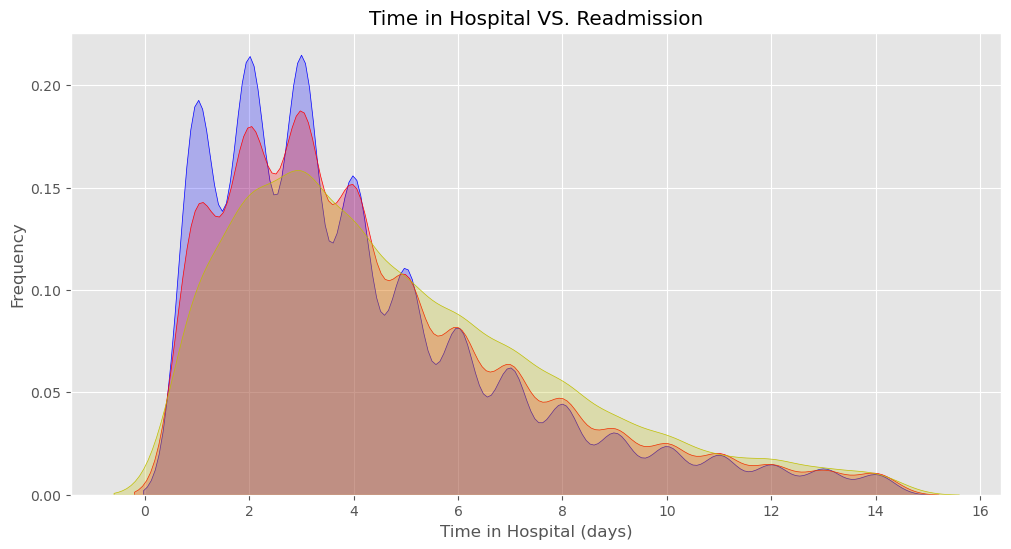

In [57]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

fig = plt.figure(figsize=(12,6))
ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', fill=True, label='No readmission')
ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', fill=True, label='Readmission in >30 days')
ax = sns.kdeplot(df.loc[(df['readmitted'] == 2), 'time_in_hospital'], color='y', fill=True, label='Readmission in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      71518 non-null  object  
 1   gender                    71518 non-null  int64   
 2   age                       71518 non-null  int64   
 3   admission_type_id         71518 non-null  int64   
 4   discharge_disposition_id  71518 non-null  int64   
 5   admission_source_id       71518 non-null  int64   
 6   time_in_hospital          71518 non-null  int64   
 7   num_lab_procedures        71518 non-null  int64   
 8   num_procedures            71518 non-null  int64   
 9   num_medications           71518 non-null  int64   
 10  number_outpatient         71518 non-null  int64   
 11  number_emergency          71518 non-null  int64   
 12  number_inpatient          71518 non-null  int64   
 13  diag_1                    71518 non-null  float64 

In [59]:
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    71518 non-null  int64   
 1   age                       71518 non-null  int64   
 2   admission_type_id         71518 non-null  int64   
 3   discharge_disposition_id  71518 non-null  int64   
 4   admission_source_id       71518 non-null  int64   
 5   time_in_hospital          71518 non-null  int64   
 6   num_lab_procedures        71518 non-null  int64   
 7   num_procedures            71518 non-null  int64   
 8   num_medications           71518 non-null  int64   
 9   number_outpatient         71518 non-null  int64   
 10  number_emergency          71518 non-null  int64   
 11  number_inpatient          71518 non-null  int64   
 12  diag_1                    71518 non-null  float64 
 13  diag_2                    71518 non-null  float64 

In [72]:
new_data = pd.read_csv("new_data.csv")
new_data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,5,6,25,1,1,41,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,15,1,1,7,3,59,0,18,0,...,0,0,3,1,1,0,0,1,0,0
2,0,25,1,1,7,2,11,5,13,2,...,0,0,0,1,0,1,0,0,0,0
3,1,35,1,1,7,2,44,1,16,0,...,0,0,3,1,0,0,0,1,0,0
4,1,45,1,1,7,1,51,0,8,0,...,0,0,2,1,0,0,0,1,0,0


In [73]:
y = new_data['readmitted']
X = new_data.drop(['readmitted'], axis=1)

In [74]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [75]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

In [90]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [109]:
X = new_data[['num_medications','time_in_hospital']]


In [110]:
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

In [111]:
dbscan.fit(X)
cluster_labels = dbscan.labels_

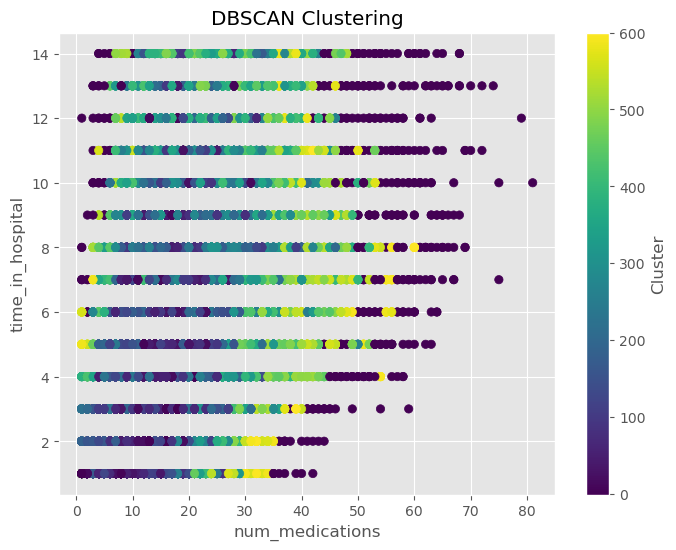

In [113]:

plt.figure(figsize=(8, 6))
plt.scatter(X['num_medications'], X['time_in_hospital'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('num_medications')
plt.ylabel('time_in_hospital')
plt.colorbar(label='Cluster')
plt.show()